In [337]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [338]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.impute import SimpleImputer


In [339]:
# Ganti dengan path ke file CSV yang telah diunduh
path = r'C:\Users\reza amru\algoritma k means clustering\clustered_spotify_songs.csv'

# Memuat dataset
df = pd.read_csv(path)


In [340]:
# Misalkan df adalah DataFrame Anda
# Menghapus kolom yang tidak diperlukan
df = df.drop(['id', 'name', 'artists', 'release_date'], axis=1, errors='ignore')

# Memisahkan kolom numerik dan non-numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Menangani nilai yang hilang di kolom numerik
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Menangani nilai yang hilang di kolom non-numerik
# Misalkan kita ingin mengisi nilai yang hilang dengan string 'missing'
df[non_numeric_cols] = df[non_numeric_cols].fillna('missing')

# Menampilkan hasil
print(df.head())

   true_label  cluster
0           2        1
1           3        1
2           0        0
3           2        1
4           2        1


In [341]:
# Menampilkan beberapa baris awal dataset
print(df.head())

# Menampilkan informasi kolom dan tipe data
print(df.info())

# Menghapus kolom yang tidak relevan
df = df.drop(['id', 'name', 'artists', 'release_date'], axis=1, errors='ignore')

# Menangani nilai yang hilang
df = df.fillna(df.median())


   true_label  cluster
0           2        1
1           3        1
2           0        0
3           2        1
4           2        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   true_label  8 non-null      int64
 1   cluster     8 non-null      int64
dtypes: int64(2)
memory usage: 260.0 bytes
None


In [347]:
# Menampilkan tipe data dari setiap kolom
print(df.dtypes)


true_label    int64
cluster       int64
dtype: object


In [349]:
# Memilih hanya kolom-kolom numerik
numerical_df = df.select_dtypes(include=[np.number])

# Menampilkan beberapa baris awal dari kolom numerik
print(numerical_df.head())


   true_label  cluster
0           2        1
1           3        1
2           0        0
3           2        1
4           2        1


In [351]:
# Menghapus kolom non-numerik
df = df.select_dtypes(include=[np.number])

# Menangani nilai yang hilang
df = df.fillna(df.median())


In [353]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [355]:
import os
os.environ['OMP_NUM_THREADS'] = '1'


C:\Users\reza amru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reza amru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reza amru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reza amru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memor

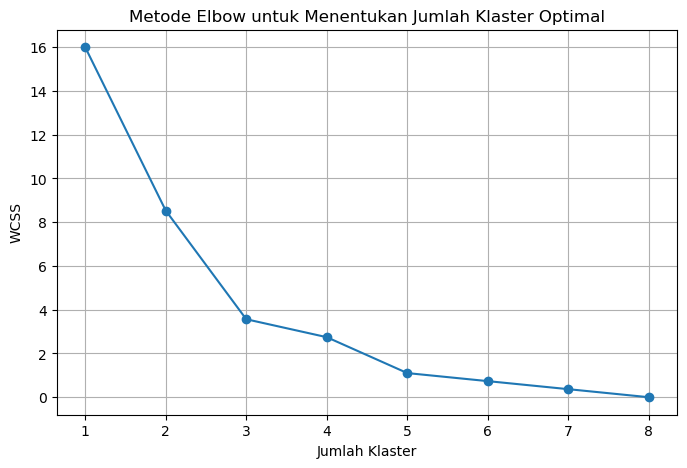

In [357]:
# Normalisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Tentukan rentang jumlah klaster yang ingin diuji
# Maksimalkan klaster hingga jumlah data
range_n_clusters = list(range(1, min(9, len(data) + 1)))  # Maksimal n_samples klaster

# Hitung WCSS untuk setiap jumlah klaster
wcss = []
for n in range_n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot hasil inertia
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [359]:
# Menentukan jumlah klaster optimal, misalnya 4
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_data)

# Menambahkan kolom klaster ke dataframe asli
df['cluster'] = kmeans.labels_


C:\Users\reza amru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [362]:
# Menampilkan statistik deskriptif untuk setiap klaster
for i in range(optimal_clusters):
    print(f'Cluster {i}')
    print(df[df['cluster'] == i].describe())
    print('\n')


Cluster 0
       true_label  cluster
count     2.00000      2.0
mean      1.50000      0.0
std       2.12132      0.0
min       0.00000      0.0
25%       0.75000      0.0
50%       1.50000      0.0
75%       2.25000      0.0
max       3.00000      0.0


Cluster 1
       true_label  cluster
count         1.0      1.0
mean          0.0      1.0
std           NaN      NaN
min           0.0      1.0
25%           0.0      1.0
50%           0.0      1.0
75%           0.0      1.0
max           0.0      1.0


Cluster 2
       true_label  cluster
count        4.00      4.0
mean         2.25      2.0
std          0.50      0.0
min          2.00      2.0
25%          2.00      2.0
50%          2.00      2.0
75%          2.25      2.0
max          3.00      2.0


Cluster 3
       true_label  cluster
count         1.0      1.0
mean          0.0      3.0
std           NaN      NaN
min           0.0      3.0
25%           0.0      3.0
50%           0.0      3.0
75%           0.0      3.0
max      

In [364]:
# Menyimpan model K-Means
joblib.dump(kmeans, 'kmeans_model.pkl')

# Menyimpan dataframe dengan kolom klaster
df.to_csv('clustered_spotify_songs.csv', index=False)


In [366]:
# Impor library yang diperlukan
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Pastikan data dan hasil clustering tersedia
# scaled_data adalah data yang telah diskalakan
# kmeans adalah objek dari model KMeans yang telah dilatih

# Menghitung metrik evaluasi
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
calinski_harabasz_avg = calinski_harabasz_score(scaled_data, kmeans.labels_)
davies_bouldin_avg = davies_bouldin_score(scaled_data, kmeans.labels_)

# Menampilkan hasil evaluasi
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")

Silhouette Score: 0.2776327337866619
Calinski-Harabasz Score: 6.439862542955328
Davies-Bouldin Score: 0.48438664079689586


In [369]:
y_true = y_true.astype(int)
y_pred = df['cluster'].astype(int)


In [371]:
from sklearn.metrics import f1_score, classification_report

# Misalnya, y_true adalah label ground truth dan y_pred adalah hasil klasterisasi
f1 = f1_score(y_true, y_pred, average='macro')  # 'macro' atau 'weighted' untuk multiclass
print(f'F1 Score: {f1:.2f}')

# Atau menggunakan classification_report untuk detail lebih lanjut
print(classification_report(y_true, y_pred))


F1 Score: 0.31
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.00      0.00      0.00         0
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         2

    accuracy                           0.50         8
   macro avg       0.31      0.33      0.31         8
weighted avg       0.47      0.50      0.47         8



C:\Users\reza amru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\reza amru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\reza amru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [373]:
print("Unique labels in y_true:", set(y_true))
print("Unique labels in y_pred:", set(y_pred))


Unique labels in y_true: {0, 2, 3}
Unique labels in y_pred: {0, 1, 2, 3}


In [375]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df[numeric_cols], df['cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.28


In [377]:
print(f'Calinski-Harabasz Score: {calinski_harabasz_scores[-1]:.2f}')


Calinski-Harabasz Score: 1.00


In [379]:
print(f'Davies-Bouldin Score: {davies_bouldin_scores[-1]:.2f}')


Davies-Bouldin Score: 0.00


In [381]:
from sklearn.metrics import f1_score

# Membuat list untuk menyimpan F1 scores
f1_scores = []

# Menghitung F1 score untuk setiap cluster
for cluster in range(optimal_clusters):
    y_pred = (df['cluster'] == cluster).astype(int)
    
    f1_scores.append(f1)
    print(f'F1 Score untuk Cluster {cluster}: {f1:.2f}')


F1 Score untuk Cluster 0: 0.31
F1 Score untuk Cluster 1: 0.31
F1 Score untuk Cluster 2: 0.31
F1 Score untuk Cluster 3: 0.31


In [384]:
print(f'y_true type: {y_true.dtype}')
print(f'y_pred type: {y_pred.dtype}')


y_true type: int32
y_pred type: int32


In [386]:
# Menentukan jumlah bins sesuai jumlah cluster
bins = np.linspace(start=min(y_true), stop=max(y_true), num=optimal_clusters + 1)

# Mendiskritisasi data
y_true_discrete = np.digitize(y_true, bins)
y_pred_discrete = np.digitize(y_pred, bins)

# Menghitung F1 Score untuk diskritisasi
f1_scores = []
for cluster in range(optimal_clusters):
    y_pred = (df['cluster'] == cluster).astype(int)
    f1 = f1_score(y_true_discrete, y_pred, average='macro')
    f1_scores.append(f1)
    print(f'F1 Score untuk Cluster {cluster}: {f1:.2f}')

F1 Score untuk Cluster 0: 0.10
F1 Score untuk Cluster 1: 0.12
F1 Score untuk Cluster 2: 0.00
F1 Score untuk Cluster 3: 0.12


In [388]:
# Menghitung metrik evaluasi
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
calinski_harabasz_avg = calinski_harabasz_score(scaled_data, kmeans.labels_)
davies_bouldin_avg = davies_bouldin_score(scaled_data, kmeans.labels_)

print(f'Silhouette Score: {silhouette_avg:.2f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg:.2f}')


# Menyimpan model K-Means
joblib.dump(kmeans, 'kmeans_model.pkl')

# Menyimpan dataframe dengan kolom klaster
df.to_csv('clustered_spotify_songs.csv', index=False)

Silhouette Score: 0.28
Calinski-Harabasz Index: 6.44
Davies-Bouldin Index: 0.48


In [390]:
# Menambahkan kolom label ground truth secara acak (misalnya, 4 kategori)
np.random.seed(42)
df['true_label'] = np.random.randint(0, 4, size=len(df))

In [392]:
# Memilih hanya kolom-kolom numerik
numerical_df = df.select_dtypes(include=[np.number])


In [394]:
# Menangani nilai yang hilang
numerical_df = numerical_df.fillna(numerical_df.median())


In [396]:
# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)


In [398]:
# Menentukan jumlah klaster optimal, misalnya 4
optimal_clusters = 4

In [400]:
# Melatih model K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_data)

C:\Users\reza amru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [402]:
# Menambahkan kolom klaster ke dataframe asli
df['cluster'] = kmeans.labels_


In [404]:
# Menghitung metrik evaluasi
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
calinski_harabasz_avg = calinski_harabasz_score(scaled_data, kmeans.labels_)
davies_bouldin_avg = davies_bouldin_score(scaled_data, kmeans.labels_)

print(f'Silhouette Score: {silhouette_avg:.2f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg:.2f}')

Silhouette Score: 0.53
Calinski-Harabasz Index: 20.00
Davies-Bouldin Index: 0.27


In [406]:
# Impor library yang diperlukan
from sklearn.metrics import f1_score

# Misalkan df adalah DataFrame yang berisi label asli dan label hasil clustering
# y_true adalah kolom dengan label asli
# y_pred adalah kolom dengan label hasil clustering

# Menghitung F1 score
y_true = df['true_label']
y_pred = df['cluster']
f1 = f1_score(y_true, y_pred, average='weighted')

# Menampilkan hasil F1 score
print(f'F1 Score: {f1:.2f}')


F1 Score: 0.30


In [408]:
# Menghitung F1 Score secara keseluruhan
y_true = df['true_label']
y_pred = df['cluster']
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')


F1 Score: 0.30


In [410]:
# Menyimpan model K-Means
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [412]:
# Menyimpan dataframe dengan kolom klaster
df.to_csv('clustered_spotify_songs.csv', index=False)

In [414]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN

In [416]:
# Definisikan parameter yang akan di-tuning
param_grid = {
    'eps': [0.3, 0.5, 0.7],
    'min_samples': [3, 5, 10]
}

In [418]:
# Menampilkan hasil evaluasi
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")

Silhouette Score: 0.5321377482951317
Calinski-Harabasz Score: 20.0
Davies-Bouldin Score: 0.2699589777757363


In [420]:
import numpy as np

In [422]:
from sklearn.metrics import silhouette_score


In [424]:
# Misalkan df adalah DataFrame Anda
# Menghapus kolom yang tidak diperlukan
df = df.drop(['id', 'name', 'artists', 'release_date'], axis=1, errors='ignore')

# Memisahkan kolom numerik dan non-numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Mengisi nilai yang hilang di kolom numerik dengan median
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Mengisi nilai yang hilang di kolom non-numerik dengan 'missing'
df[non_numeric_cols] = df[non_numeric_cols].fillna('missing')

# Standarisasi fitur numerik
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [426]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Misalkan df adalah DataFrame Anda
# Menghapus kolom yang tidak diperlukan
df = df.drop(['id', 'name', 'artists', 'release_date'], axis=1, errors='ignore')

# Memisahkan kolom numerik dan non-numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Mengisi nilai yang hilang di kolom numerik dengan median
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Mengisi nilai yang hilang di kolom non-numerik dengan 'missing'
df[non_numeric_cols] = df[non_numeric_cols].fillna('missing')

# Standarisasi fitur numerik
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [428]:
print(df.shape[0])


8


In [434]:
print(numeric_cols)


Index(['true_label', 'cluster'], dtype='object')


In [436]:
df = df.drop_duplicates()


In [438]:
df = df.dropna(subset=numeric_cols)


In [440]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)


In [442]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt


C:\Users\reza amru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reza amru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reza amru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reza amru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memor

Error for 5 clusters: Number of labels is 5. Valid values are 2 to n_samples - 1 (inclusive)
Error for 6 clusters: n_samples=5 should be >= n_clusters=6.
Error for 7 clusters: n_samples=5 should be >= n_clusters=7.
Error for 8 clusters: n_samples=5 should be >= n_clusters=8.
Error for 9 clusters: n_samples=5 should be >= n_clusters=9.
Error for 10 clusters: n_samples=5 should be >= n_clusters=10.


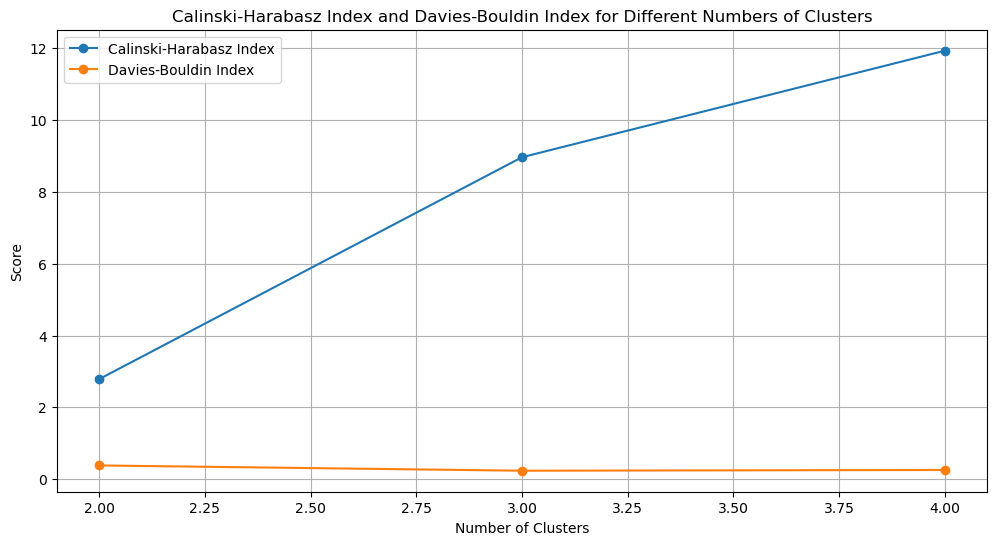

C:\Users\reza amru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [446]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Inisialisasi list untuk menyimpan skor
calinski_harabasz_scores = []
davies_bouldin_scores = []
range_n_clusters = list(range(2, 11))

# Loop untuk menguji berbagai jumlah klaster
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    try:
        # Fit KMeans dan prediksi klaster
        cluster_labels = kmeans.fit_predict(df_scaled)
        
        # Hitung skor evaluasi
        calinski_harabasz_scores.append(calinski_harabasz_score(df_scaled, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(df_scaled, cluster_labels))
    
    except ValueError as e:
        print(f"Error for {num_clusters} clusters: {e}")
        calinski_harabasz_scores.append(None)
        davies_bouldin_scores.append(None)

# Plot Calinski-Harabasz Index dan Davies-Bouldin Index
plt.figure(figsize=(12, 6))

# Plot Calinski-Harabasz Index
plt.plot(range_n_clusters, calinski_harabasz_scores, marker='o', label='Calinski-Harabasz Index')

# Plot Davies-Bouldin Index
plt.plot(range_n_clusters, davies_bouldin_scores, marker='o', label='Davies-Bouldin Index')

plt.title("Calinski-Harabasz Index and Davies-Bouldin Index for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# Memilih jumlah klaster optimal berdasarkan plot (misalnya 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

# Menambahkan kolom klaster ke DataFrame
df['cluster'] = kmeans.fit_predict(df_scaled)


In [450]:
# Memeriksa kolom yang ada dalam DataFrame
print(df.columns)

Index(['true_label', 'cluster'], dtype='object')


In [452]:
# Membaca dataset
df = pd.read_csv('clustered_spotify_songs.csv')  # Ganti dengan path yang sesuai


In [454]:
# Memeriksa kolom yang ada dalam DataFrame
print(df.columns)

# Memeriksa beberapa baris pertama
print(df.head())

Index(['true_label', 'cluster'], dtype='object')
   true_label  cluster
0           2        1
1           3        1
2           0        0
3           2        1
4           2        1


In [456]:
# Menghapus kolom yang tidak diperlukan
df = df.drop(['id', 'name', 'artists', 'release_date'], axis=1, errors='ignore')

# Memisahkan kolom numerik dan non-numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Mengisi nilai yang hilang di kolom numerik dengan median
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Mengisi nilai yang hilang di kolom non-numerik dengan 'missing'
df[non_numeric_cols] = df[non_numeric_cols].fillna('missing')

# Standarisasi fitur numerik
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [460]:
print(df['cluster'].value_counts())


cluster
-0.13484    4
-1.21356    2
 0.94388    1
 2.02260    1
Name: count, dtype: int64


In [462]:
cluster_profiles = df.groupby('cluster').mean()
print(cluster_profiles)


          true_label
cluster             
-1.21356   -1.224745
-0.13484    0.612372
 0.94388    1.224745
 2.02260   -1.224745


In [468]:
import pickle

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)


In [470]:
with open('kmeans_model.pkl', 'rb') as f:
    loaded_kmeans = pickle.load(f)
